## Q1. How can you create a Bokeh plot using Python code?


In [9]:
#first we need to import the modules
from bokeh.plotting import figure ,output_file, show
from bokeh.sampledata.iris import flowers

# Showing output inside notebook
bokeh.io.output_notebook()

# instantiating the figure object 
graph = figure(title = "Bokeh plot") 
 
# plotting the scatter graph
graph.scatter( flowers["sepal_length"], flowers["sepal_width"] )

#show the graph
show(graph)


Loading BokehJS ...

## Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.


In Bokeh, glyphs are visual shapes that can be added to a plot to represent data points. They can be used to create scatter plots, line charts, bar charts, and more.

To add glyphs to a Bokeh plot, you can use the figure function from the bokeh.plotting module. 

In [12]:
# create some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# create a new plot with a title and axis labels
p = figure(title="Line and scatter plot Example", x_axis_label='x', y_axis_label='y')

# add a line glyph
p.line(x, y, line_width=2, color="blue")

# add circles as glyphs to the plot
p.circle(x, y, size=10)

# show the plot
show(p)

## Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?


Let's customize our last example

In [17]:
# create some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# create a new plot and add customization
p = figure(title="Line and scatter plot Example", x_axis_label='Custom X Label', y_axis_label='Custom Y Label')
p.xaxis.axis_label_text_color = "red"
p.yaxis.axis_label_text_font_size = "14pt"
#background color, grid lina and plot size
p.background_fill_color = "lightgray"
p.grid.grid_line_color = "white"
p.width  = 800
p.height = 400

# add a line glyph
p.line(x, y, line_width=2, color="blue")

# add circles as glyphs to the plot
p.circle(x, y, size=10, legend_label="Data Points")

#appearance of the legend
p.legend.location = "top_right"
p.legend.label_text_font_size = "12pt"
p.legend.background_fill_alpha = 0.5

# show the plot
show(p)

## Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?


Bokeh server is a Python process that connect UI event to running Python code.Users can create plots that respond to their input ,update in real time and include widgets for controlling the plot. Let's take an example with the exponential function with slide to adjust power.

In [24]:
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
import numpy as np

# Define the data source
x = np.linspace(0, 5, 100)
y = np.exp(x)
source = ColumnDataSource(data=dict(x=x, y=y))

# Define the plot
plot = figure(title='Exponential Plot', x_axis_label='X', y_axis_label='Y')
plot.line('x', 'y', source=source, line_width=2)

# Define the slider widget
slider = Slider(title='Power', value=1, start=1, end=5, step=0.1)

# Define the callback function
def update_data(attrname, old, new):
    power = slider.value
    new_y = np.exp(power * x)
    source.data = dict(x=x, y=new_y)

slider.on_change('value', update_data)

# Combine the plot and slider into a layout
layout = column(plot, slider)

# Add the layout to the current document
curdoc().add_root(layout)


## Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

In [25]:
from flask import Flask, render_template
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.embed import components
from bokeh.resources import CDN
import numpy as np

app = Flask(__name__)


@app.route('/')
def index():
    # Define the data source
    x = np.linspace(0, 5, 100)
    y = np.exp(x)
    source = ColumnDataSource(data=dict(x=x, y=y))

    # Define the plot
    plot = figure(title='Exponential Plot', x_axis_label='X', y_axis_label='Y')
    plot.line('x', 'y', source=source, line_width=2)

    # Define the slider widget
    slider = Slider(title='Power', value=1, start=1, end=5, step=0.1)

    # Define the callback function
    def update_data(attrname, old, new):
        power = slider.value
        new_y = np.exp(power * x)
        source.data = dict(x=x, y=new_y)

    slider.on_change('value', update_data)

    # Combine the plot and slider into a layout
    layout = column(plot, slider)

    # Add the layout to the current document
    curdoc().add_root(layout)

    script, div = components(plot)
    cdn_js = CDN.js_files[0]

    return render_template('index.html', script=script, cdn_js = cdn_js, div=div)

if __name__ == '__main__':
    app.run(port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\caesa\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


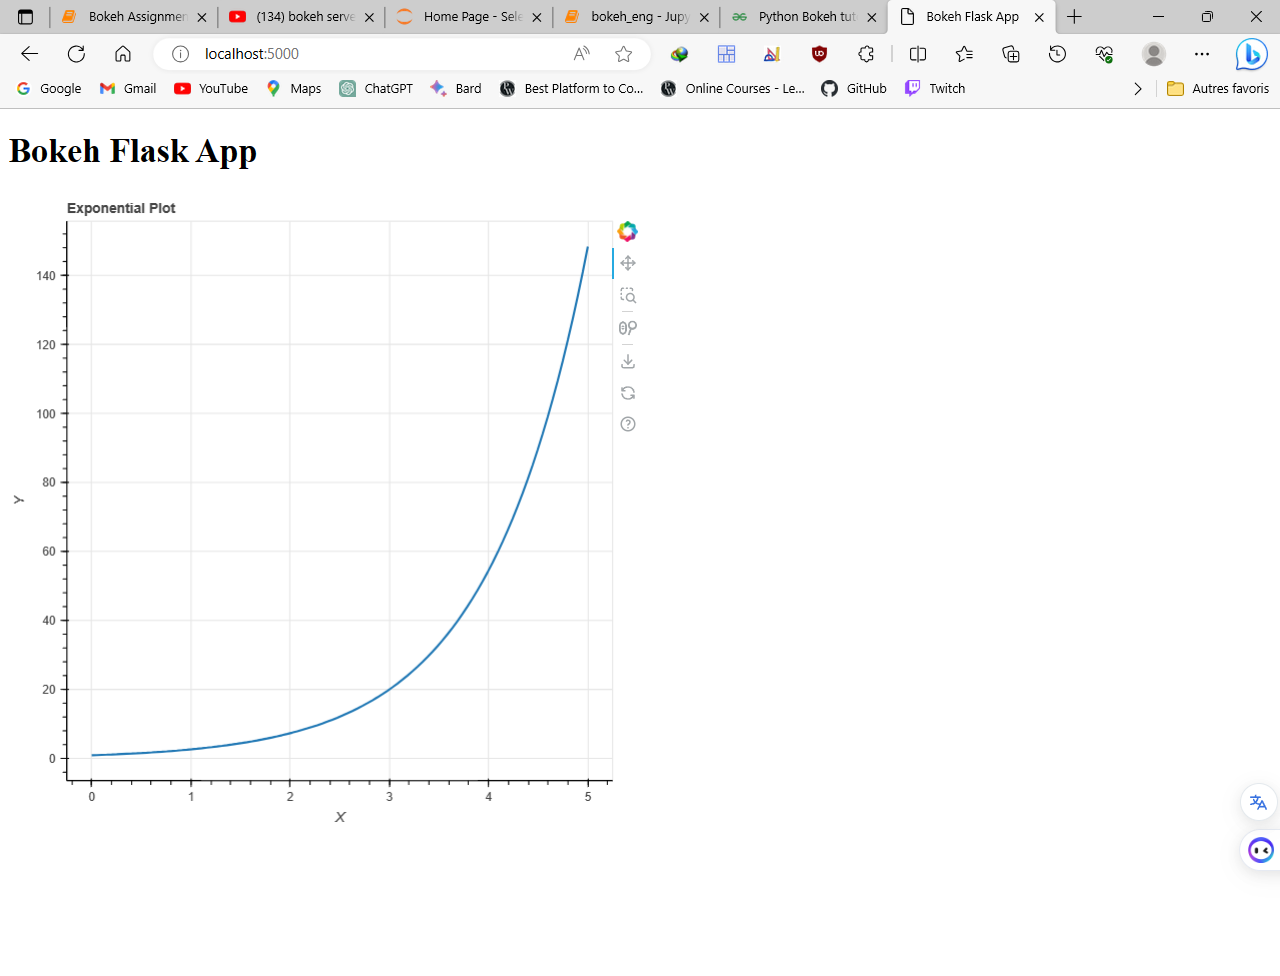

In [26]:
from IPython.display import Image
Image(filename="Bokeh Flask App.png")